## Práctica 2 - Clasificación Multi-Instancia



**OPCIÓN 2: Comparación de métodos**

Seleccione al menos dos algoritmos de los disponibles en la bibliotecas indicadas. Seleccione al menos tres problemas semi-supervisados de los repositorios indicados. Realice las siguientes tareas:

Aplique los algoritmos seleccionados a los datasets
Compare los resultados y explique qué conclusiones se podrían obtener

Se ha optado por modificar la librería MIL del repositorio de github para que funcione en esta versión de python. Se han modificado el nombre de algunos ficheros y algunas funciones que daban error al ejecutarlas debido a algunas erratas.

Instalación de la librería [MIL ](https://github.com/rosasalberto/mil?tab=readme-ov-file)

In [1]:
!unzip MILpy.zip

Archive:  MILpy.zip
replace MILpy/.git/config? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: MILpy/.git/config       
replace MILpy/.git/description? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: MILpy/.git/description  
  inflating: MILpy/.git/FETCH_HEAD   
  inflating: MILpy/.git/HEAD         
  inflating: MILpy/.git/hooks/applypatch-msg.sample  
  inflating: MILpy/.git/hooks/commit-msg.sample  
  inflating: MILpy/.git/hooks/fsmonitor-watchman.sample  
  inflating: MILpy/.git/hooks/post-update.sample  
  inflating: MILpy/.git/hooks/pre-applypatch.sample  
  inflating: MILpy/.git/hooks/pre-commit.sample  
  inflating: MILpy/.git/hooks/pre-merge-commit.sample  
  inflating: MILpy/.git/hooks/pre-push.sample  
  inflating: MILpy/.git/hooks/pre-rebase.sample  
  inflating: MILpy/.git/hooks/pre-receive.sample  
  inflating: MILpy/.git/hooks/prepare-commit-msg.sample  
  inflating: MILpy/.git/hooks/push-to-checkout.sample  
  inflating: MILpy/.git/hooks/update.sample  
  infla

Importamos los datasets que vamos a utilizar en este ejercicio.



In [2]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.utils import shuffle
import random as rand

from MILpy.functions.mil_cross_val import mil_cross_val

#Import Algorithms
from MILpy.Algorithms.BOW import BOW
from MILpy.Algorithms.simpleMIL import simpleMIL
from MILpy.Algorithms.MILBoost import MILBoost
from MILpy.Algorithms.MILES import MILES # Bag Space Methods

In [3]:
# Establecer semilla para reproducibilidad
SEED = 4911
np.random.seed(SEED)

rng = np.random.RandomState(SEED)

Importar datos


In [4]:
# Import the MILpy modules
from MILpy.data.load_data import load_data

In [7]:
# Corel African
bags_musk2,labels_musk2,_ = load_data('musk2_original')

# Dataset Elephants
bags_elephant,labels_elephant,_ = load_data('elephant_original')

# Dataset Fox
bags_fox,labels_fox,_ = load_data('fox_original')

In [32]:
# Función para obtener información sobre los datos
def get_data_info(bags, labels):
    bags_per_label = {}
    bags_count = len(bags)
    labels_count = len(set(labels.flatten()))

    for i in range(bags_count):
        bag_labels = set(labels[i])
        for label in bag_labels:
            if label not in bags_per_label:
                bags_per_label[label] = 1
            else:
                bags_per_label[label] += 1

    return bags_per_label, bags_count, labels_count

# Función para visualizar información en un gráfico de barras
def plot_bar_chart(bags_info, dataset_name):
    labels = list(bags_info.keys())
    values = list(bags_info.values())

    plt.figure(figsize=(10, 5))
    plt.bar(labels, values, color='blue')
    plt.xlabel('Label')
    plt.ylabel('Número de Bags')
    plt.title(f'Distribución de Bags por Label en {dataset_name}')
    plt.show()

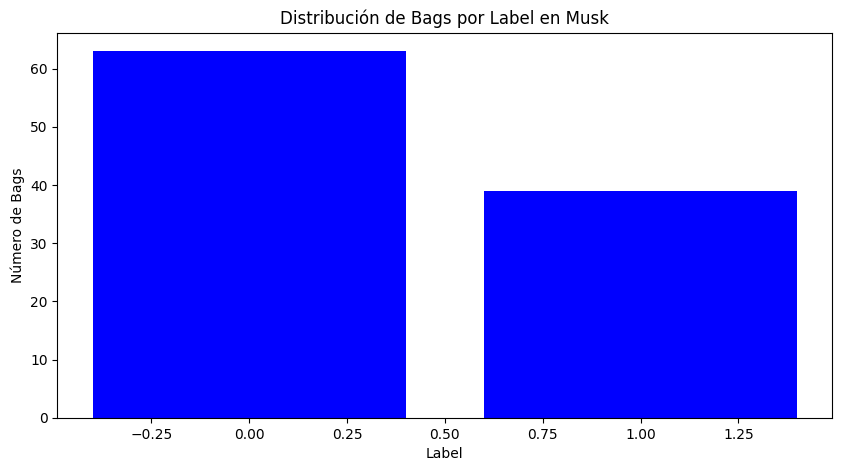

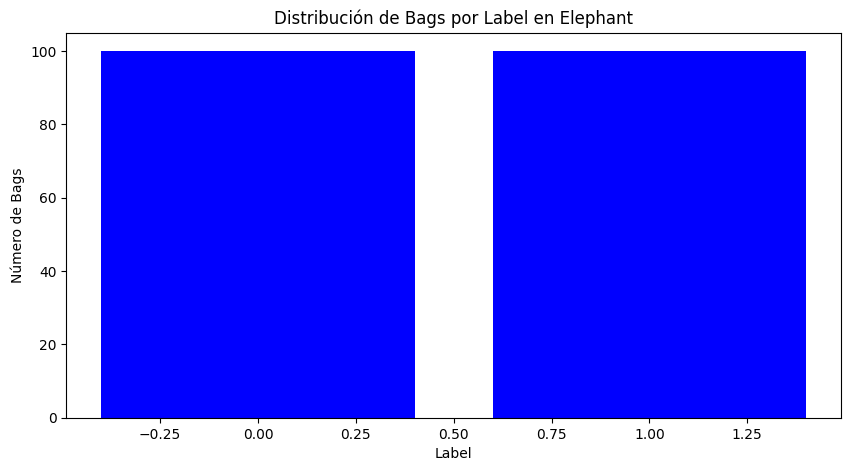

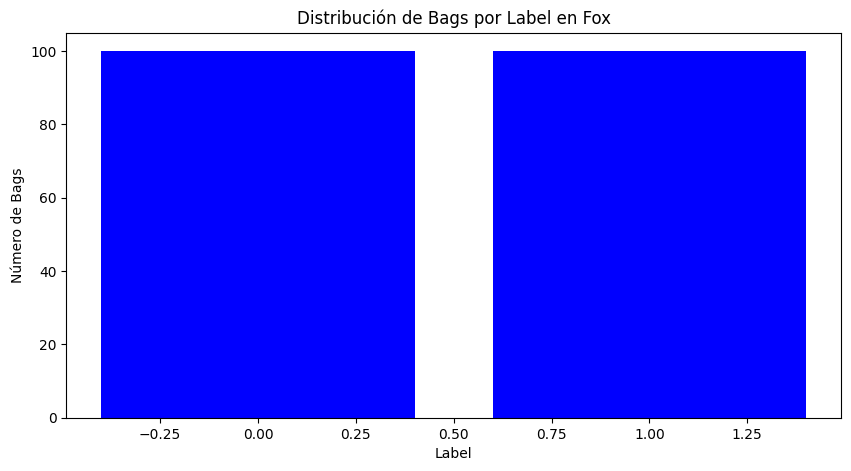

In [33]:
# Obtener información para cada conjunto de datos
bags_info_Musk, bags_count_Musk, labels_count_Musk = get_data_info(bags_musk2, labels_musk2)
bags_info_Elephant, bags_count_Elephant, labels_count_Elephant = get_data_info(bags_Elephant, labels_Elephant)
bags_info_Fox, bags_count_Fox, labels_count_Fox = get_data_info(bags_Fox, labels_Fox)

# Visualizar información para cada conjunto de datos
plot_bar_chart(bags_info_Musk, 'Musk')
plot_bar_chart(bags_info_Elephant, 'Elephant')
plot_bar_chart(bags_info_Fox, 'Fox')

In [15]:
# Mostrar información general
print(f'Total de Bags en Musk: {bags_count_Musk}, Labels diferentes: {labels_count_Musk}')
print(f'Total de Bags en Elephant: {bags_count_Elephant}, Labels diferentes: {labels_count_Elephant}')
print(f'Total de Bags en Fox: {bags_count_Fox}, Labels diferentes: {labels_count_Fox}')

Total de Bags en Musk: 102, Labels diferentes: 2
Total de Bags en Elephant: 200, Labels diferentes: 2
Total de Bags en Fox: 200, Labels diferentes: 2


In [26]:
#Musk2
bags_musk2, labels_musk2 = shuffle(bags_musk2, labels_musk2, random_state=SEED)

# Elephant
bags_Elephant, labels_Elephant = shuffle(bags_Elephant, labels_Elephant, random_state=SEED)
# train_bags_Elephant, test_bags_Elephant, train_labels_Elephant, test_labels_Elephant = train_test_split(bags_Elephant, labels_Elephant, test_size=0.2, random_state=SEED)

# Fox
bags_Fox, labels_Fox = shuffle(bags_Fox, labels_Fox, random_state=SEED)

In [22]:
folds = 5

## SimpleMIL

In [30]:
SMILa = simpleMIL()
parameters_smil = {'type': 'average'}

# Musk2
accuracie_Musk, results_accuracie_Musk, auc_Musk,results_auc_Musk  = mil_cross_val(bags=bags_musk2,labels=labels_musk2, model=SMILa, folds=folds, parameters=parameters_smil)
# Elephant
accuracie_Elephant, results_accuracie_Elephant, auc_Elephant,results_auc_Elephant  = mil_cross_val(bags=bags_Elephant,labels=labels_Elephant, model=SMILa, folds=folds, parameters=parameters_smil)

# Fox
accuracie_Fox, results_accuracie_Fox, auc_Fox,results_auc_Fox  = mil_cross_val(bags=bags_Fox,labels=labels_Fox, model=SMILa, folds=folds, parameters=parameters_smil)

print("\n\n\n\n")
print("Musk2 - simpleMIL")
print("Accuracy: ",accuracie_Musk)
print("AUC: ",auc_Musk)

print("\n")
print("Elephant - simpleMIL")
print("Accuracy: ",accuracie_Elephant)
print("AUC: ",auc_Elephant)

print("\n")
print("Fox - simpleMIL")
print("Accuracy: ",accuracie_Fox)
print("AUC: ",auc_Fox)

Fold# 0...Fold# 1...Fold# 2...Fold# 3...Fold# 4...Fold# 0...Fold# 1...Fold# 2...Fold# 3...Fold# 4...Fold# 0...Fold# 1...Fold# 2...Fold# 3...Fold# 4...




Musk2 - simpleMIL
Accuracy:  79.28571428571429
AUC:  78.18681318681318


Elephant - simpleMIL
Accuracy:  77.5
AUC:  77.5


Fox - simpleMIL
Accuracy:  67.5
AUC:  67.5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

## MIL BOOST

In [31]:
milboost_classifier = MILBoost()

# Musk2
accuracie_Musk, results_accuracie_Musk, auc_Musk,results_auc_Musk  = mil_cross_val(bags=bags_musk2,labels=labels_musk2, model=milboost_classifier, folds=folds)
# Elephant
accuracie_Elephant, results_accuracie_Elephant, auc_Elephant,results_auc_Elephant  = mil_cross_val(bags=bags_Elephant,labels=labels_Elephant, model=milboost_classifier, folds=folds)

# Fox
accuracie_Fox, results_accuracie_Fox, auc_Fox,results_auc_Fox  = mil_cross_val(bags=bags_Fox,labels=labels_Fox, model=milboost_classifier, folds=folds)

print("\n\n\n\n")
print("Musk2 - MILBoost")
print("Accuracy: ",accuracie_Musk)
print("AUC: ",auc_Musk)

print("\n")
print("Elephant - MILBoost")
print("Accuracy: ",accuracie_Elephant)
print("AUC: ",auc_Elephant)

print("\n")
print("Fox - MILBoost")
print("Accuracy: ",accuracie_Fox)
print("AUC: ",auc_Fox)

Fold# 0...Fold# 1...Fold# 2...Fold# 3...Fold# 4...Fold# 0...Fold# 1...Fold# 2...Fold# 3...Fold# 4...Fold# 0...Fold# 1...Fold# 2...Fold# 3...Fold# 4...




Musk2 - MILBoost
Accuracy:  39.391609977324265
AUC:  56.035943223443226


Elephant - MILBoost
Accuracy:  50.0
AUC:  85.62499999999999


Fox - MILBoost
Accuracy:  50.0
AUC:  49.425


# Conclusiones

## SimpleMIL
**Musk2**: Consigue un accuracy del 79,28% y un AUC de 78,18. Lo que le hace tener cierta capacidad de discriminación.

**Elephant**: Tiene un desempeño parecido al anterior dataset. De un 77,5% tanto en accuracy como en AUC. Lo que puede indicar que

**Fox**: El accuracy y AUC del 67,5% muestran un rendimiento aceptable aunque peor que en los conjuntos de datos anteriores

## MILBoost
**Musk2**: El accuracy es muy bajo, del 39.39% y el AUC del 56.03% evidenciando las dificultades que tiene para ajustarse al modelo. Este resultado puede deberse a problemas específicos en el proceso de boosting o la naturaleza del conjunto de datos.

**Elephant**: El accuracy del 50% indica un rendimiento similar al azar, pero el AUC del 85.62% sugiere un rendimiento mejorado en la discriminación de clases.

**Fox**: El accuracy y AUC del 50% y 49.425%, respectivamente, indican unos resultados muy similares a los que se podrían obtener con un clasificador aleatorio.